<a href="https://colab.research.google.com/github/afifahuzair19/Degree-Diary/blob/main/all_three_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Directories: ['Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22']
Validation Directories: ['Actor_23', 'Actor_24']
Test Directories: ['Actor_01', 'Actor_02']
Number of training samples: 1194
Number of validation samples: 120
Number of test samples: 119


Some weights of HubertForSpeechClassification were not initialized from the model checkpoint at facebook/hubert-large-ls960-ft and are newly initialized: ['classifier.dense.weight', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'classifier.out_proj.bias', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/5 - Validation: 100%|██████████| 10/10 [00:36<00:00,  3.64s/it]


Epoch 1/5 - Train Accuracy: 0.2663316582914573, Train Loss: 1.8555356186628342, Validation Accuracy: 0.5, Validation Loss: 1.5126820802688599


Epoch 2/5 - Validation: 100%|██████████| 10/10 [00:34<00:00,  3.40s/it]


Epoch 2/5 - Train Accuracy: 0.5569514237855946, Train Loss: 1.211504145860672, Validation Accuracy: 0.6333333333333333, Validation Loss: 1.0654431968927383


Epoch 3/5 - Validation: 100%|██████████| 10/10 [00:36<00:00,  3.69s/it]


Epoch 3/5 - Train Accuracy: 0.711892797319933, Train Loss: 0.821505277454853, Validation Accuracy: 0.6583333333333333, Validation Loss: 1.2134171053767204


Epoch 4/5 - Validation: 100%|██████████| 10/10 [00:35<00:00,  3.58s/it]


Epoch 4/5 - Train Accuracy: 0.8149078726968174, Train Loss: 0.5633714168518782, Validation Accuracy: 0.7916666666666666, Validation Loss: 0.8785210995003581


Epoch 5/5 - Validation: 100%|██████████| 10/10 [00:33<00:00,  3.38s/it]


Epoch 5/5 - Train Accuracy: 0.8500837520938024, Train Loss: 0.426593405418098, Validation Accuracy: 0.6833333333333333, Validation Loss: 1.229324573278427


After 5 epochs - Test: 100%|██████████| 10/10 [00:33<00:00,  3.37s/it]


After 5 epochs - Test Accuracy: 0.7142857142857143, Test Loss: 1.018941739294678
Class 0 - Correct: 7, Total: 7, Accuracy: 1.0
Class 1 - Correct: 13, Total: 16, Accuracy: 0.8125
Class 2 - Correct: 8, Total: 16, Accuracy: 0.5
Class 3 - Correct: 8, Total: 16, Accuracy: 0.5
Class 4 - Correct: 15, Total: 16, Accuracy: 0.9375
Class 5 - Correct: 5, Total: 16, Accuracy: 0.3125
Class 6 - Correct: 14, Total: 16, Accuracy: 0.875
Class 7 - Correct: 15, Total: 16, Accuracy: 0.9375
The model with the best accuracy on the validation data is at epoch: 4
Training results have been saved to /content/drive/My Drive/training_resultsnoaug2402.xlsx


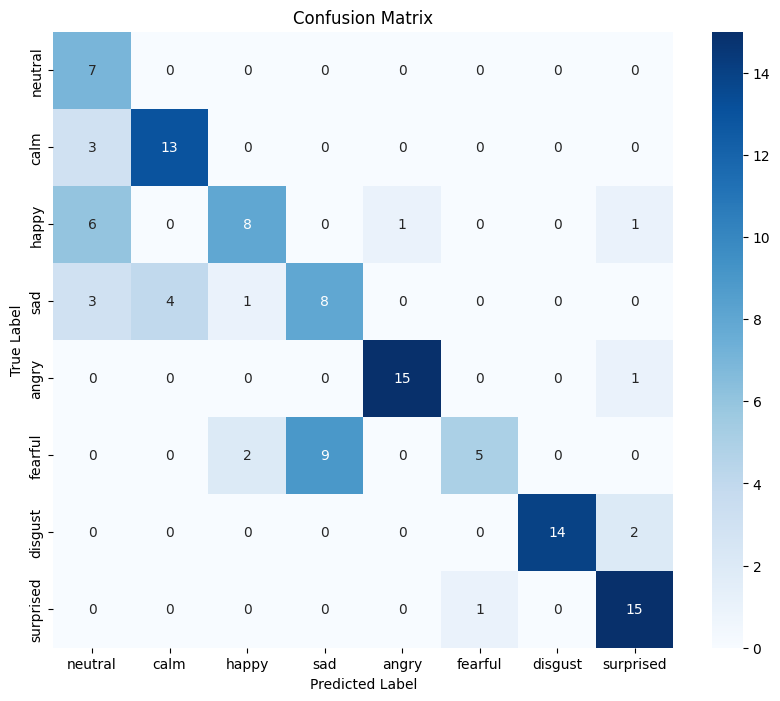

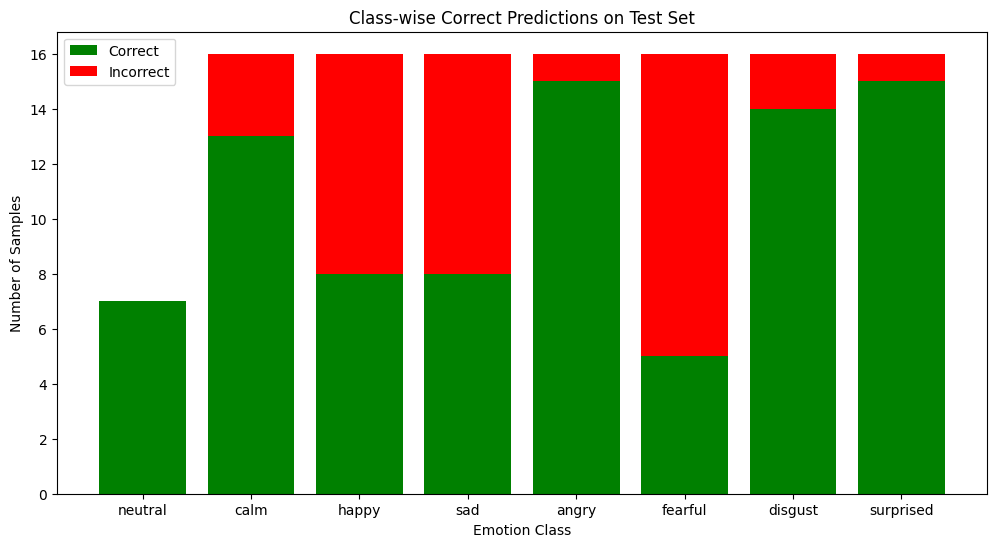

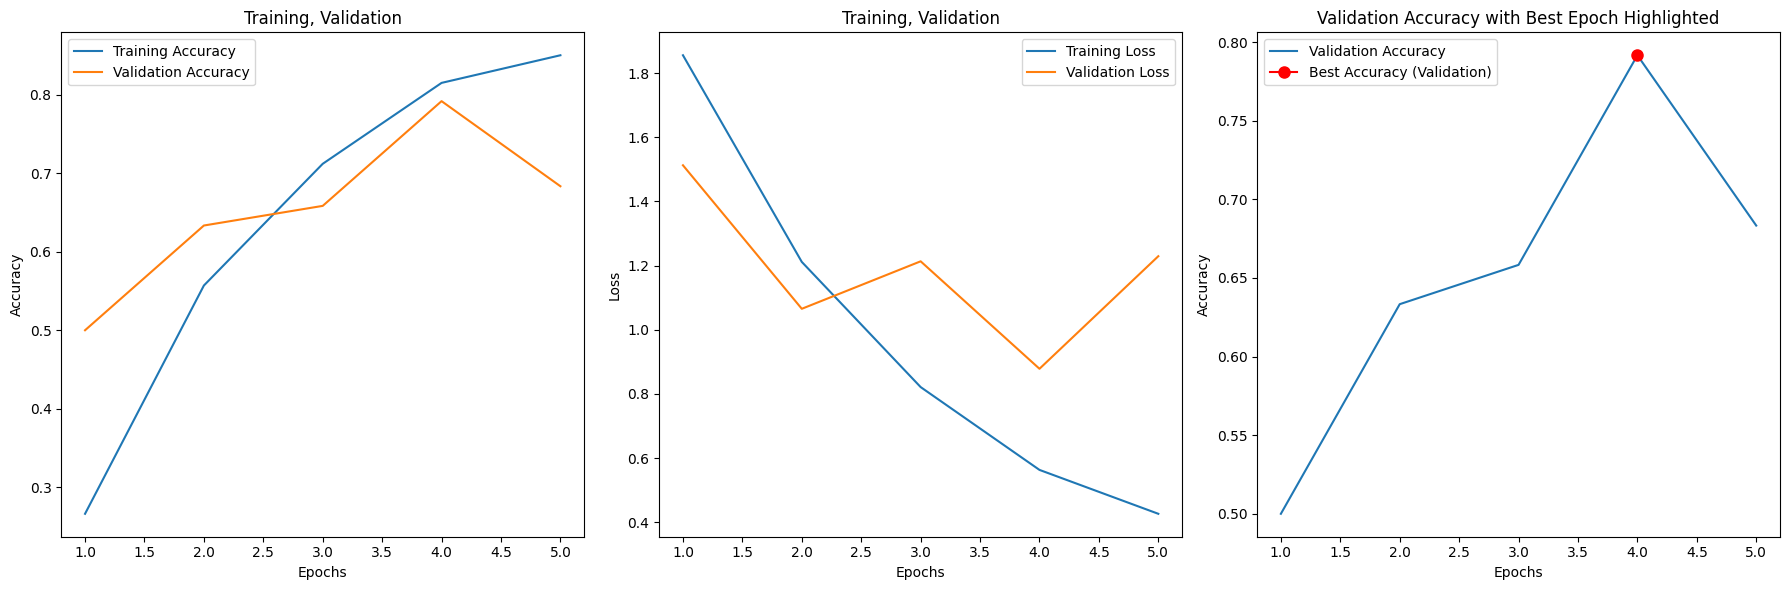

In [ ]:
#Hubert-noaugmentaton
!pip install transformers
!pip install pandas
import pandas as pd
import torch
import torchaudio
from transformers import AutoConfig, Wav2Vec2Processor, HubertPreTrainedModel, HubertModel
from google.colab import drive
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torch
import torch.nn as nn
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
drive.mount('/content/drive')
# Mount Google Drive
model_name_or_path = "facebook/hubert-large-ls960-ft"
# Configure the pre-trained model
config = AutoConfig.from_pretrained(pretrained_model_name_or_path=model_name_or_path)

# Define the audio directory
audio_dir = '/content/drive/My Drive/Audio_Speech_Actors_01-24'
# Initialize the audio processor with the correct sampling rate
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

# Initialize lists to store file paths and labels
train_paths = []
valid_paths = []
test_paths = []
train_labels = []
valid_labels = []
test_labels = []

# Collect file paths and labels
all_dirs = sorted(os.listdir(audio_dir))
train_dirs = all_dirs[2:22]
valid_dirs = all_dirs[22:24]
test_dirs = all_dirs[:2]
# Print the directories used for training, validation, and testing
print(f"Train Directories: {train_dirs}")
print(f"Validation Directories: {valid_dirs}")
print(f"Test Directories: {test_dirs}")
for sub_dir in all_dirs:
    sub_dir_path = os.path.join(audio_dir, sub_dir)

    if os.path.isdir(sub_dir_path):
        for filename in os.listdir(sub_dir_path):
            if filename.endswith(".wav"):
                filepath = os.path.join(sub_dir_path, filename)
                filename_without_extension = os.path.splitext(os.path.basename(filepath))[0]

                parts = filename_without_extension.split("-")

                if len(parts) > 2:
                    part_2 = parts[2]
                    if part_2 == '01':
                        emotion_label = 0  # 'neutral'
                    elif part_2 == '02':
                        emotion_label = 1  # 'calm'
                    elif part_2 == '03':
                        emotion_label = 2  # 'happy'
                    elif part_2 == '04':
                        emotion_label = 3  # 'sad'
                    elif part_2 == '05':
                        emotion_label = 4  # 'angry'
                    elif part_2 == '06':
                        emotion_label = 5  # 'fearful'
                    elif part_2 == '07':
                        emotion_label = 6  # 'disgust'
                    elif part_2 == '08':
                        emotion_label = 7  # 'surprised'
                    else:
                        emotion_label = 8  # 'unknown'

                    # Determine the set to which the file belongs
                    if sub_dir in train_dirs:
                        train_paths.append(filepath)
                        train_labels.append(emotion_label)
                    elif sub_dir in valid_dirs:
                        valid_paths.append(filepath)
                        valid_labels.append(emotion_label)
                    elif sub_dir in test_dirs:
                        test_paths.append(filepath)
                        test_labels.append(emotion_label)
# Print the number of samples in each set
print(f"Number of training samples: {len(train_paths)}")
print(f"Number of validation samples: {len(valid_paths)}")
print(f"Number of test samples: {len(test_paths)}")

# Build the datasets
class AudioEmotionDataset(Dataset):
    def __init__(self, file_paths, labels, processor):
        self.file_paths = file_paths
        self.labels = labels
        self.processor = processor

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        file_path = self.file_paths[idx]
        label = self.labels[idx]

        # Utilize torchaudio to load the audio file and convert to mono
        waveform, sample_rate = torchaudio.load(file_path, normalize=True)

        # Ensure the audio is in mono
        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)

        # Resample audio to the correct sampling rate (16000 Hz)
        resampler = torchaudio.transforms.Resample(sample_rate, 16000)
        waveform = resampler(waveform)

        # Check if waveform has non-zero length
        if waveform.shape[1] > 0:
            # Process the waveform using the Wav2Vec2 processor
            speech = self.processor(waveform[0].numpy(), padding="max_length", truncation=True, max_length=6*16000,
                                    return_tensors="pt", sampling_rate=16000).input_values.squeeze(0)

            return speech, label
        else:
            return None

# Remove entries with None values
train_dataset = AudioEmotionDataset(train_paths, train_labels, processor)
valid_dataset = AudioEmotionDataset(valid_paths, valid_labels, processor)
test_dataset = AudioEmotionDataset(test_paths, test_labels, processor)

train_dataset = [(data[0], data[1]) for data in train_dataset if data[0] is not None and data[1] is not None]
valid_dataset = [(data[0], data[1]) for data in valid_dataset if data[0] is not None and data[1] is not None]
test_dataset = [(data[0], data[1]) for data in test_dataset if data[0] is not None and data[1] is not None]

# Create DataLoader for the datasets
train_loader = DataLoader(train_dataset, batch_size=12, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=12, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=12, shuffle=False)

# Update the number of labels in the configuration
config.num_labels = len(set(train_labels))

# Define the classification head for the added layer
class HubertClassificationHead(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(0.1)
        self.out_proj = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, x):
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

# Define the model for classification
class HubertForSpeechClassification(HubertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.hubert = HubertModel(config)
        self.classifier = HubertClassificationHead(config)
        self.init_weights()

    def forward(self, x):
        outputs = self.hubert(x)
        hidden_states = outputs[0]
        x = torch.mean(hidden_states, dim=1)
        x = self.classifier(x)
        return x

# Load the pre-trained Hubert model for speech emotion recognition
fine_tuned_model = HubertForSpeechClassification.from_pretrained(
    model_name_or_path,
    config=config,
    ignore_mismatched_sizes=True
)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(fine_tuned_model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.95)

# Train the model for a specified number of epochs
num_epochs = 5

# Lists to store data for plotting
train_accuracies = []
valid_accuracies = []
test_accuracies = []
train_losses = []
valid_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Training loop
    fine_tuned_model.train()
    total_correct_train = 0
    total_samples_train = 0
    total_loss_train = 0.0

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Training'):
        optimizer.zero_grad()
        outputs = fine_tuned_model(inputs)
        _, predictions = torch.max(outputs, 1)
        total_correct_train += (predictions == labels).sum().item()
        total_samples_train += labels.size(0)
        loss = criterion(outputs, labels)
        total_loss_train += loss.item()
        loss.backward()
        optimizer.step()

    accuracy_train = total_correct_train / total_samples_train
    avg_loss_train = total_loss_train / len(train_loader)

    # Validation loop
    fine_tuned_model.eval()
    total_correct_valid = 0
    total_samples_valid = 0
    total_loss_valid = 0.0

    with torch.no_grad():
        for inputs, labels in tqdm(valid_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Validation'):
            outputs = fine_tuned_model(inputs)
            _, predictions = torch.max(outputs, 1)
            total_correct_valid += (predictions == labels).sum().item()
            total_samples_valid += labels.size(0)
            loss = criterion(outputs, labels)
            total_loss_valid += loss.item()

    accuracy_valid = total_correct_valid / total_samples_valid
    avg_loss_valid = total_loss_valid / len(valid_loader)

    # Store data for plotting
    train_accuracies.append(accuracy_train)
    valid_accuracies.append(accuracy_valid)
    train_losses.append(avg_loss_train)
    valid_losses.append(avg_loss_valid)

    # Learning rate scheduler step
    scheduler.step()

    # Display results after each epoch
    print(f'Epoch {epoch + 1}/{num_epochs} - '
          f'Train Accuracy: {accuracy_train}, Train Loss: {avg_loss_train}, '
          f'Validation Accuracy: {accuracy_valid}, Validation Loss: {avg_loss_valid}')

# Test loop
fine_tuned_model.eval()
total_correct_test = 0
total_samples_test = 0
total_loss_test = 0.0
class_correct = [0] * config.num_labels
class_total = [0] * config.num_labels

all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc=f'After {num_epochs} epochs - Test'):
        outputs = fine_tuned_model(inputs)
        _, predictions = torch.max(outputs, 1)
        total_correct_test += (predictions == labels).sum().item()
        total_samples_test += labels.size(0)
        loss = criterion(outputs, labels)
        total_loss_test += loss.item()

        # Calculate class-wise correct predictions
        for i in range(config.num_labels):
            class_total[i] += (labels == i).sum().item()
            class_correct[i] += ((predictions == labels) & (labels == i)).sum().item()

        # Collect labels and predictions for confusion matrix
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

accuracy_test = total_correct_test / total_samples_test
avg_loss_test = total_loss_test / len(test_loader)

# Compute the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'],
            yticklabels=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('/content/drive/My Drive/confusion_matrixnoaug2402.png')  # Modify the path to the desired location

# Display results for the test set, including class-wise accuracy
print(f'After {num_epochs} epochs - Test Accuracy: {accuracy_test}, Test Loss: {avg_loss_test}')

for i in range(config.num_labels):
    class_acc = class_correct[i] / class_total[i] if class_total[i] != 0 else 0
    print(f'Class {i} - Correct: {class_correct[i]}, Total: {class_total[i]}, Accuracy: {class_acc}')

# Save an image with class-wise correct predictions on the test set
plt.figure(figsize=(12, 6))
plt.bar(range(config.num_labels), class_correct, color='green', label='Correct')
plt.bar(range(config.num_labels), np.subtract(class_total, class_correct), bottom=class_correct, color='red', label='Incorrect')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Samples')
plt.title('Class-wise Correct Predictions on Test Set')
plt.legend()
plt.xticks(range(config.num_labels), labels=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'])
plt.savefig('/content/drive/My Drive/classwise_correct_predictionsnoaug2402.png')  # Modify the path to the desired location

# Store data for plotting
test_accuracies.append(accuracy_test)
test_losses.append(avg_loss_test)

# Find the best epoch
best_epoch = valid_accuracies.index(max(valid_accuracies)) + 1

# Display and save plots with best performance
epochs_range = range(1, num_epochs + 1)

# Accuracy plot
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
plt.plot(epochs_range, valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation')
plt.legend()

# Loss plot
plt.subplot(1, 3, 2)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation')
plt.legend()

# Best Accuracy plot
plt.subplot(1, 3, 3)
plt.plot(epochs_range, valid_accuracies, label='Validation Accuracy')
plt.plot(best_epoch, max(valid_accuracies), marker='o', markersize=8, label='Best Accuracy (Validation)', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy with Best Epoch Highlighted')
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/My Drive/best_performance_plotsnoaug2402.png')  # Modify the path to the desired location

# Display results in console
print(f'The model with the best accuracy on the validation data is at epoch: {best_epoch}')
# Salvarea modelului
model_save_path = '/content/drive/My Drive/best_modelnoaug2402.pth'  # Modify the path to the desired location
torch.save(fine_tuned_model.state_dict(), model_save_path)

data = {
    'Epoch': epochs_range,
    'Train Accuracy': train_accuracies + [None] * (num_e*pochs - len(train_accuracies)),
    'Validation Accuracy': valid_accuracies + [None] * (num_epochs - len(valid_accuracies)),
    'Test Accuracy': test_accuracies + [None] * (num_epochs - len(test_accuracies)),
    'Train Loss': train_losses + [None] * (num_epochs - len(train_losses)),
    'Validation Loss': valid_losses + [None] * (num_epochs - len(valid_losses)),
    'Test Loss': test_losses + [None] * (num_epochs - len(test_losses))
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_path = '/content/drive/My Drive/training_resultsnoaug2402.xlsx'
df.to_excel(excel_path, index=False)
print(f'Training results have been saved to {excel_path}')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of HubertForSpeechClassification were not initialized from the model checkpoint at facebook/hubert-large-ls960-ft and are newly initialized: ['classifier.dense.bias', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/5 - Validation: 100%|██████████| 10/10 [00:33<00:00,  3.32s/it]


Epoch 1/5 - Train Accuracy: 0.16080402010050251, Train Loss: 2.0192328906059265, Validation Accuracy: 0.35833333333333334, Validation Loss: 1.6561565399169922


Epoch 2/5 - Validation: 100%|██████████| 10/10 [00:33<00:00,  3.30s/it]


Epoch 2/5 - Train Accuracy: 0.4271356783919598, Train Loss: 1.504746361374855, Validation Accuracy: 0.5083333333333333, Validation Loss: 1.2253922671079636


Epoch 3/5 - Validation: 100%|██████████| 10/10 [00:32<00:00,  3.25s/it]


Epoch 3/5 - Train Accuracy: 0.6440536013400335, Train Loss: 1.0173343372344972, Validation Accuracy: 0.6833333333333333, Validation Loss: 0.9351084314286708


Epoch 4/5 - Validation: 100%|██████████| 10/10 [00:33<00:00,  3.31s/it]


Epoch 4/5 - Train Accuracy: 0.7093802345058626, Train Loss: 0.7926710498332977, Validation Accuracy: 0.6916666666666667, Validation Loss: 0.7718399055302143


Epoch 5/5 - Validation: 100%|██████████| 10/10 [00:34<00:00,  3.43s/it]


Epoch 5/5 - Train Accuracy: 0.8207705192629816, Train Loss: 0.5405377482622862, Validation Accuracy: 0.7, Validation Loss: 0.8779528796672821


After 5 epochs - Test: 100%|██████████| 10/10 [00:34<00:00,  3.44s/it]


After 5 epochs - Test Accuracy: 0.7058823529411765, Test Loss: 0.9050165235996246
Class 0 - Correct: 6, Total: 7, Accuracy: 0.8571428571428571
Class 1 - Correct: 13, Total: 16, Accuracy: 0.8125
Class 2 - Correct: 10, Total: 16, Accuracy: 0.625
Class 3 - Correct: 5, Total: 16, Accuracy: 0.3125
Class 4 - Correct: 14, Total: 16, Accuracy: 0.875
Class 5 - Correct: 8, Total: 16, Accuracy: 0.5
Class 6 - Correct: 13, Total: 16, Accuracy: 0.8125
Class 7 - Correct: 15, Total: 16, Accuracy: 0.9375
The model with the best accuracy on the validation data is at epoch: 5
Training results have been saved to /content/drive/My Drive/training_results2402.xlsx


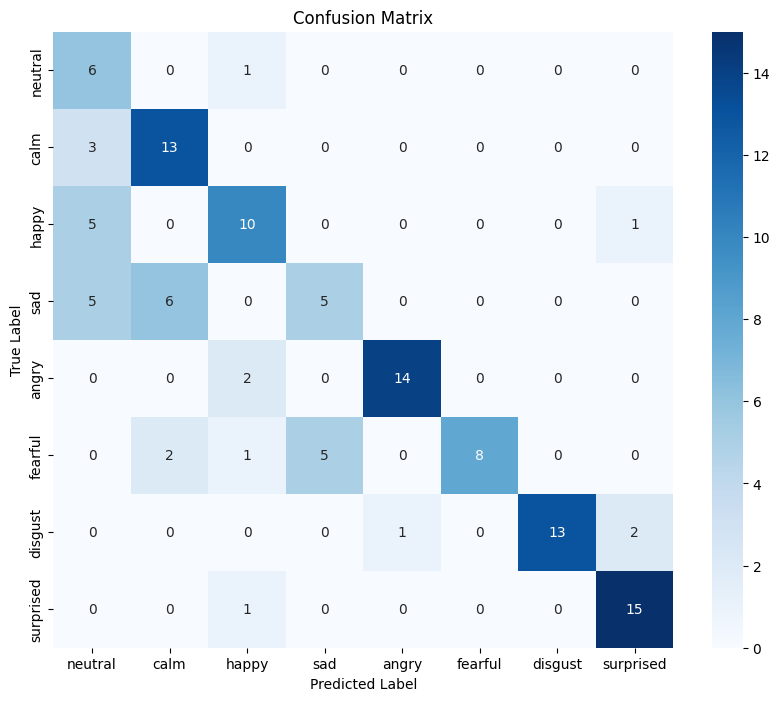

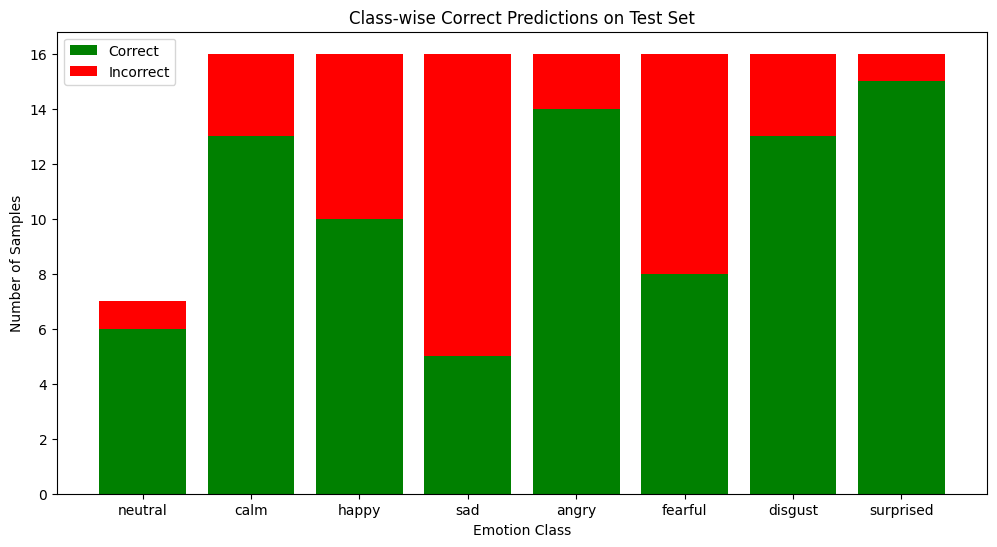

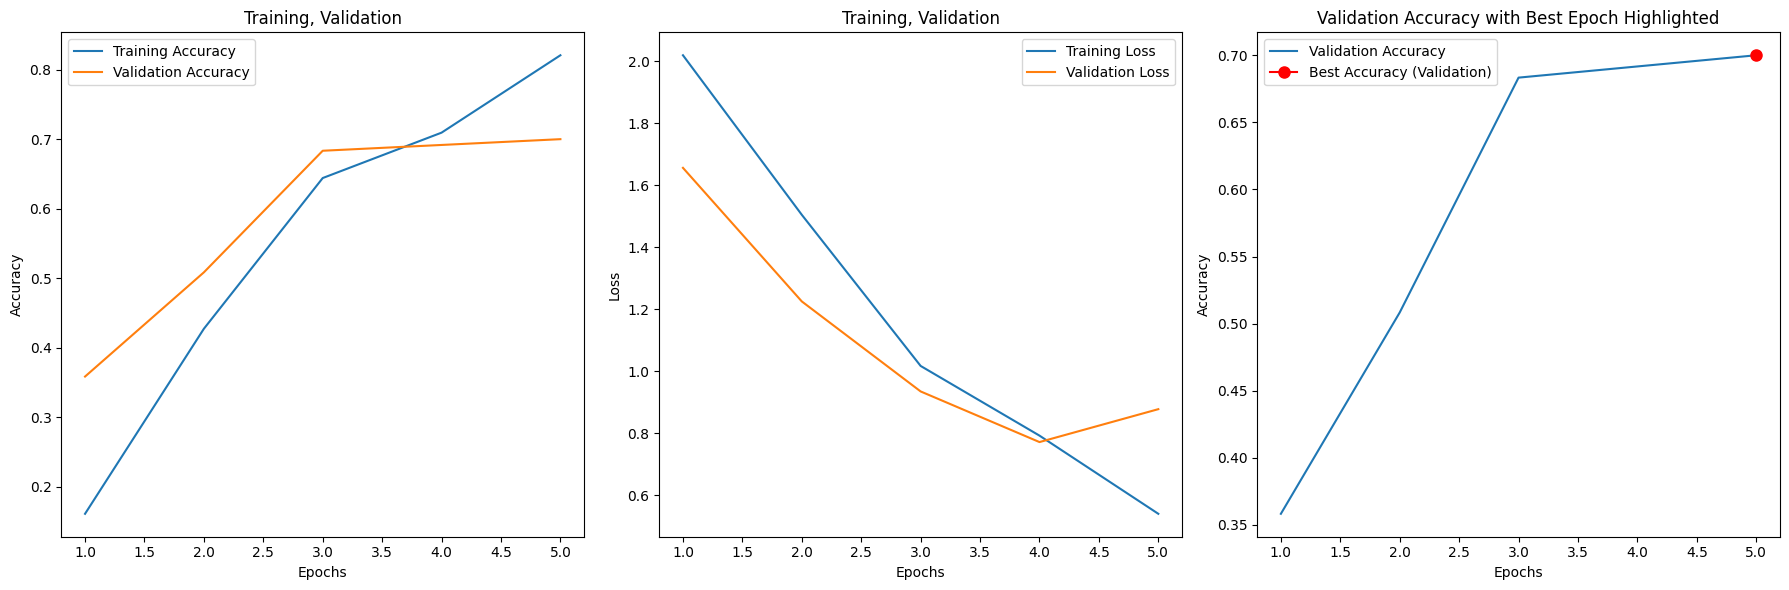

In [ ]:
#Hubert-augmentation
!pip install transformers
!pip install pandas
import pandas as pd
import torch
import torchaudio
from transformers import AutoConfig, Wav2Vec2Processor, HubertPreTrainedModel, HubertModel
from google.colab import drive
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torch
import torch.nn as nn
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
drive.mount('/content/drive')
# Mount Google Drive
model_name_or_path = "facebook/hubert-large-ls960-ft"
# Configure the pre-trained model
config = AutoConfig.from_pretrained(pretrained_model_name_or_path=model_name_or_path)

# Define the audio directory
audio_dir = '/content/drive/My Drive/Audio_Speech_Actors_01-24'
# Initialize the audio processor with the correct sampling rate
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

# Initialize li-sts to store file paths and labels
train_paths = []
valid_paths = []
test_paths = []
train_labels = []
valid_labels = []
test_labels = []

# Collect file paths and labels
all_dirs = sorted(os.listdir(audio_dir))
train_dirs = all_dirs[2:22]
valid_dirs = all_dirs[22:24]
test_dirs = all_dirs[:2]

for sub_dir in all_dirs:
    sub_dir_path = os.path.join(audio_dir, sub_dir)

    if os.path.isdir(sub_dir_path):
        for filename in os.listdir(sub_dir_path):
            if filename.endswith(".wav"):
                filepath = os.path.join(sub_dir_path, filename)
                filename_without_extension = os.path.splitext(os.path.basename(filepath))[0]

                parts = filename_without_extension.split("-")

                if len(parts) > 2:
                    part_2 = parts[2]
                    if part_2 == '01':
                        emotion_label = 0  # 'neutral'
                    elif part_2 == '02':
                        emotion_label = 1  # 'calm'
                    elif part_2 == '03':
                        emotion_label = 2  # 'happy'
                    elif part_2 == '04':
                        emotion_label = 3  # 'sad'
                    elif part_2 == '05':
                        emotion_label = 4  # 'angry'
                    elif part_2 == '06':
                        emotion_label = 5  # 'fearful'
                    elif part_2 == '07':
                        emotion_label = 6  # 'disgust'
                    elif part_2 == '08':
                        emotion_label = 7  # 'surprised'
                    else:
                        emotion_label = 8  # 'unknown'

                    # Determine the set to which the file belongs
                    if sub_dir in train_dirs:
                        train_paths.append(filepath)
                        train_labels.append(emotion_label)
                    elif sub_dir in valid_dirs:
                        valid_paths.append(filepath)
                        valid_labels.append(emotion_label)
                    elif sub_dir in test_dirs:
                        test_paths.append(filepath)
                        test_labels.append(emotion_label)

# Build the datasets
class AudioEmotionDataset(Dataset):
    def __init__(self, file_paths, labels, processor, augment_time=False, noise_level=0.08):
        self.file_paths = file_paths
        self.labels = labels
        self.processor = processor
        self.augment_time = augment_time
        self.noise_level = noise_level

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        file_path = self.file_paths[idx]
        label = self.labels[idx]

        # Utilize torchaudio to load the audio file and convert to mono
        waveform, sample_rate = torchaudio.load(file_path, normalize=True)

        # Ensure the audio is in mono
        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)

        # Resample audio to the correct sampling rate (16000 Hz)
        resampler = torchaudio.transforms.Resample(sample_rate, 16000)
        waveform = resampler(waveform)

        # Check if waveform has non-zero length
        if waveform.shape[1] > 0:
            # Process the waveform using the Wav2Vec2 processor
            speech = self.processor(waveform[0].numpy(), padding="max_length", truncation=True, max_length=6*16000,
                                    return_tensors="pt", sampling_rate=16000).input_values.squeeze(0)

            if self.augment_time:
                # Apply time-domain augmentation by adding random noise
                noise = self.noise_level * torch.randn_like(speech)
                speech = speech + noise

            return speech, label
        else:
            return None

# Remove entries with None values
train_dataset = AudioEmotionDataset(train_paths, train_labels, processor, augment_time=True)
valid_dataset = AudioEmotionDataset(valid_paths, valid_labels, processor, augment_time=False)
test_dataset = AudioEmotionDataset(test_paths, test_labels, processor, augment_time=False)

train_dataset = [(data[0], data[1]) for data in train_dataset if data[0] is not None and data[1] is not None]
valid_dataset = [(data[0], data[1]) for data in valid_dataset if data[0] is not None and data[1] is not None]
test_dataset = [(data[0], data[1]) for data in test_dataset if data[0] is not None and data[1] is not None]

# Create DataLoader for the datasets
train_loader = DataLoader(train_dataset, batch_size=12, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=12, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=12, shuffle=False)

# Update the number of labels in the configuration
config.num_labels = len(set(train_labels))

# Define the classification head for the added layer
class HubertClassificationHead(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(0.1)
        self.out_proj = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, x):
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

# Define the model for classification
class HubertForSpeechClassification(HubertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.hubert = HubertModel(config)
        self.classifier = HubertClassificationHead(config)
        self.init_weights()

    def forward(self, x):
        outputs = self.hubert(x)
        hidden_states = outputs[0]
        x = torch.mean(hidden_states, dim=1)
        x = self.classifier(x)
        return x

# Load the pre-trained Hubert model for speech emotion recognition
fine_tuned_model = HubertForSpeechClassification.from_pretrained(
    model_name_or_path,
    config=config,
    ignore_mismatched_sizes=True
)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(fine_tuned_model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.95)

# Train the model for a specified number of epochs
num_epochs = 5

# Lists to store data for plotting
train_accuracies = []
valid_accuracies = []
test_accuracies = []
train_losses = []
valid_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Training loop
    fine_tuned_model.train()
    total_correct_train = 0
    total_samples_train = 0
    total_loss_train = 0.0

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Training'):
        optimizer.zero_grad()
        outputs = fine_tuned_model(inputs)
        _, predictions = torch.max(outputs, 1)
        total_correct_train += (predictions == labels).sum().item()
        total_samples_train += labels.size(0)
        loss = criterion(outputs, labels)
        total_loss_train += loss.item()
        loss.backward()
        optimizer.step()

    accuracy_train = total_correct_train / total_samples_train
    avg_loss_train = total_loss_train / len(train_loader)

    # Validation loop
    fine_tuned_model.eval()
    total_correct_valid = 0
    total_samples_valid = 0
    total_loss_valid = 0.0

    with torch.no_grad():
        for inputs, labels in tqdm(valid_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Validation'):
            outputs = fine_tuned_model(inputs)
            _, predictions = torch.max(outputs, 1)
            total_correct_valid += (predictions == labels).sum().item()
            total_samples_valid += labels.size(0)
            loss = criterion(outputs, labels)
            total_loss_valid += loss.item()

    accuracy_valid = total_correct_valid / total_samples_valid
    avg_loss_valid = total_loss_valid / len(valid_loader)

    # Store data for plotting
    train_accuracies.append(accuracy_train)
    valid_accuracies.append(accuracy_valid)
    train_losses.append(avg_loss_train)
    valid_losses.append(avg_loss_valid)

    # Learning rate scheduler step
    scheduler.step()

    # Display results after each epoch
    print(f'Epoch {epoch + 1}/{num_epochs} - '
          f'Train Accuracy: {accuracy_train}, Train Loss: {avg_loss_train}, '
          f'Validation Accuracy: {accuracy_valid}, Validation Loss: {avg_loss_valid}')

# Test loop
fine_tuned_model.eval()
total_correct_test = 0
total_samples_test = 0
total_loss_test = 0.0
class_correct = [0] * config.num_labels
class_total = [0] * config.num_labels
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc=f'After {num_epochs} epochs - Test'):
        outputs = fine_tuned_model(inputs)
        _, predictions = torch.max(outputs, 1)
        total_correct_test += (predictions == labels).sum().item()
        total_samples_test += labels.size(0)
        loss = criterion(outputs, labels)
        total_loss_test += loss.item()

        # Calculate class-wise correct predictions
        for i in range(config.num_labels):
            class_total[i] += (labels == i).sum().item()
            class_correct[i] += ((predictions == labels) & (labels == i)).sum().item()

        # Collect labels and predictions for confusion matrix
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

accuracy_test = total_correct_test / total_samples_test
avg_loss_test = total_loss_test / len(test_loader)

# Compute the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'],
            yticklabels=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('/content/drive/My Drive/confusion_matrix2402.png')  # Modify the path to the desired location

# Display results for the test set, including class-wise accuracy
print(f'After {num_epochs} epochs - Test Accuracy: {accuracy_test}, Test Loss: {avg_loss_test}')

for i in range(config.num_labels):
    class_acc = class_correct[i] / class_total[i] if class_total[i] != 0 else 0
    print(f'Class {i} - Correct: {class_correct[i]}, Total: {class_total[i]}, Accuracy: {class_acc}')

# Save an image with class-wise correct predictions on the test set
plt.figure(figsize=(12, 6))
plt.bar(range(config.num_labels), class_correct, color='green', label='Correct')
plt.bar(range(config.num_labels), np.subtract(class_total, class_correct), bottom=class_correct, color='red', label='Incorrect')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Samples')
plt.title('Class-wise Correct Predictions on Test Set')
plt.legend()
plt.xticks(range(config.num_labels), labels=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'])
plt.savefig('/content/drive/My Drive/classwise_correct_predictions2402.png')  # Modify the path to the desired location

# Store data for plotting
test_accuracies.append(accuracy_test)
test_losses.append(avg_loss_test)

# Find the best epoch
best_epoch = valid_accuracies.index(max(valid_accuracies)) + 1

# Display and save plots with best performance
epochs_range = range(1, num_epochs + 1)

# Accuracy plot
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
plt.plot(epochs_range, valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation')
plt.legend()

# Loss plot
plt.subplot(1, 3, 2)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation')
plt.legend()

# Best Accuracy plot
plt.subplot(1, 3, 3)
plt.plot(epochs_range, valid_accuracies, label='Validation Accuracy')
plt.plot(best_epoch, max(valid_accuracies), marker='o', markersize=8, label='Best Accuracy (Validation)', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy with Best Epoch Highlighted')
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/My Drive/best_performance_plots2402.png')  # Modify the path to the desired location

# Display results in console
print(f'The model with the best accuracy on the validation data is at epoch: {best_epoch}')
# Salvarea modelului
model_save_path = '/content/drive/My Drive/best_model2402.pth'  # Modify the path to the desired location
torch.save(fine_tuned_model.state_dict(), model_save_path)

data = {
    'Epoch': epochs_range,
    'Train Accuracy': train_accuracies + [None] * (num_epochs - len(train_accuracies)),
    'Validation Accuracy': valid_accuracies + [None] * (num_epochs - len(valid_accuracies)),
    'Test Accuracy': test_accuracies + [None] * (num_epochs - len(test_accuracies)),
    'Train Loss': train_losses + [None] * (num_epochs - len(train_losses)),
    'Validation Loss': valid_losses + [None] * (num_epochs - len(valid_losses)),
    'Test Loss': test_losses + [None] * (num_epochs - len(test_losses))
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_path = '/content/drive/My Drive/training_results2402.xlsx'
df.to_excel(excel_path, index=False)
print(f'Training results have been saved to {excel_path}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of HubertWithLSTMForSpeechClassification were not initialized from the model checkpoint at facebook/hubert-large-ls960-ft and are newly initialized: ['lstm_model.lstm.bias_hh_l0', 'lstm_model.lstm.bias_ih_l0', 'lstm_model.lstm.weight_ih_l0', 'lstm_model.lstm.weight_hh_l0_reverse', 'lstm_model.fc.bias', 'lstm_model.lstm.bias_hh_l0_reverse', 'lstm_model.lstm.weight_hh_l0', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'lstm_model.lstm.weigh

Epoch 1/5 - Train Accuracy: 0.22278056951423786, Train Loss: 1.9461997854709625, Validation Accuracy: 0.4666666666666667, Validation Loss: 1.5732964277267456


Epoch 2/5 - Validation: 100%|██████████| 10/10 [00:36<00:00,  3.60s/it]


Epoch 2/5 - Train Accuracy: 0.46901172529313234, Train Loss: 1.4130095309019088, Validation Accuracy: 0.4583333333333333, Validation Loss: 1.5084757447242736


Epoch 3/5 - Validation: 100%|██████████| 10/10 [00:40<00:00,  4.02s/it]


Epoch 3/5 - Train Accuracy: 0.5979899497487438, Train Loss: 1.0855341392755509, Validation Accuracy: 0.5833333333333334, Validation Loss: 1.2474064752459526


Epoch 4/5 - Validation: 100%|██████████| 10/10 [00:35<00:00,  3.53s/it]


Epoch 4/5 - Train Accuracy: 0.6859296482412061, Train Loss: 0.8607074415683746, Validation Accuracy: 0.6583333333333333, Validation Loss: 0.933838565647602


Epoch 5/5 - Validation: 100%|██████████| 10/10 [00:36<00:00,  3.61s/it]


Epoch 5/5 - Train Accuracy: 0.7696817420435511, Train Loss: 0.6738761486113072, Validation Accuracy: 0.675, Validation Loss: 1.0701336473226548


After 5 epochs - Test: 100%|██████████| 10/10 [00:35<00:00,  3.58s/it]


After 5 epochs - Test Accuracy: 0.7058823529411765, Test Loss: 0.9556908965110779
Class 0 - Correct: 7, Total: 7, Accuracy: 1.0
Class 1 - Correct: 16, Total: 16, Accuracy: 1.0
Class 2 - Correct: 6, Total: 16, Accuracy: 0.375
Class 3 - Correct: 5, Total: 16, Accuracy: 0.3125
Class 4 - Correct: 10, Total: 16, Accuracy: 0.625
Class 5 - Correct: 13, Total: 16, Accuracy: 0.8125
Class 6 - Correct: 11, Total: 16, Accuracy: 0.6875
Class 7 - Correct: 16, Total: 16, Accuracy: 1.0
The model with the best accuracy on the validation data is at epoch: 5
The model with the best accuracy on the validation data is at epoch: 5
Training results have been saved to /content/drive/My Drive/training_resultstransformerlstm2402.xlsx


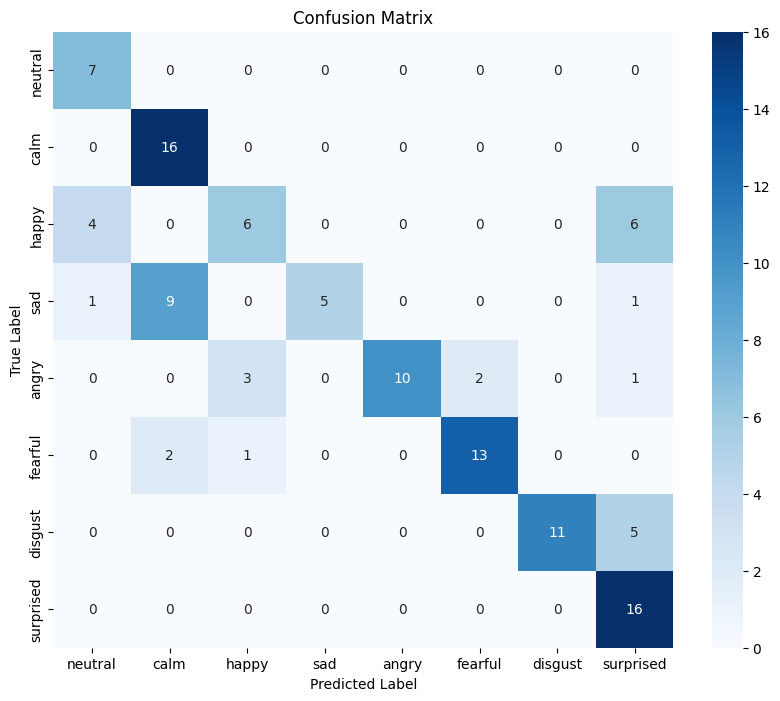

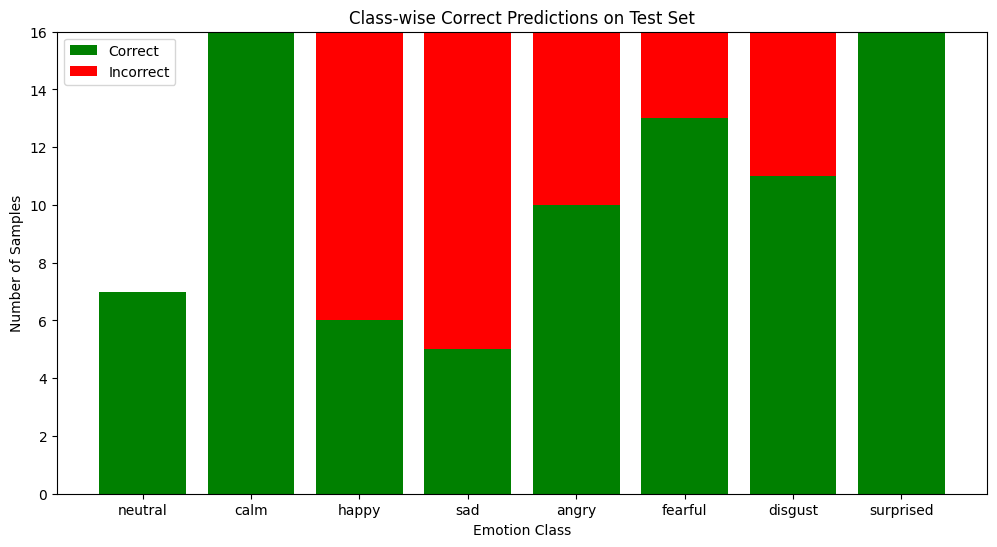

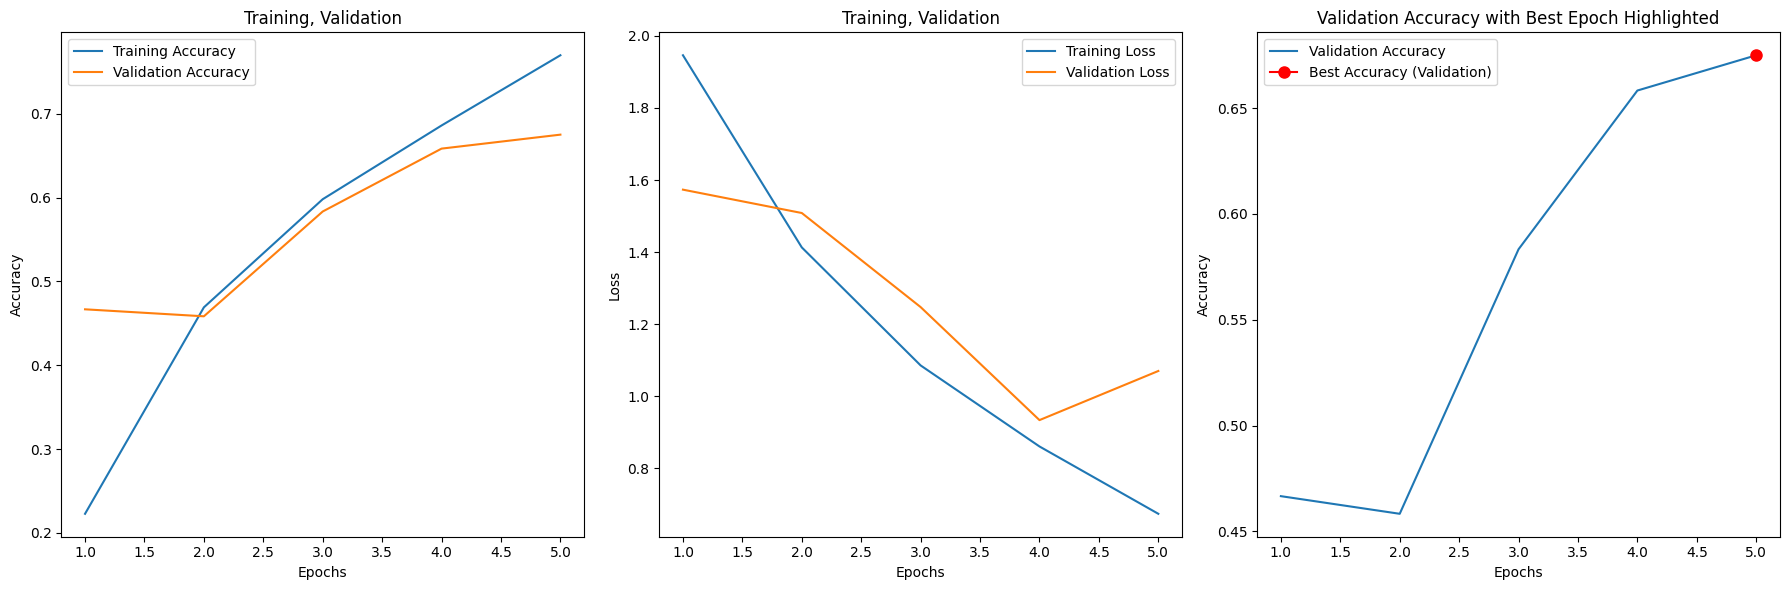

In [ ]:
# Hibrid model HuBert-LSTM
!pip install transformers
!pip install pandas
import pandas as pd
import torch
import torchaudio
from transformers import AutoConfig, Wav2Vec2Processor, HubertPreTrainedModel, HubertModel
from google.colab import drive
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torch
import torch.nn as nn
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
drive.mount('/content/drive')

# Define the audio directory
audio_dir = '/content/drive/My Drive/AudioData'
# Initialize the audio processor with the correct sampling rate
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

# Initialize lists to store file paths and labels
train_paths = []
valid_paths = []
test_paths = []
train_labels = []
valid_labels = []
test_labels = []

# Collect file paths and labels
all_dirs = sorted(os.listdir(audio_dir))
train_dirs, test_dirs = train_test_split(all_dirs, test_size=0.2, random_state=42)
valid_dirs, test_dirs = train_test_split(test_dirs, test_size=0.5, random_state=42)


for sub_dir in all_dirs:
    sub_dir_path = os.path.join(audio_dir, sub_dir)

    if os.path.isdir(sub_dir_path):
        for filename in os.listdir(sub_dir_path):
            if filename.endswith(".wav"):
                filepath = os.path.join(sub_dir_path, filename)
                filename_without_extension = os.path.splitext(os.path.basename(filepath))[0]

                parts = filename_without_extension.split("-")

                # Assign label based on folder name
                folder = sub_dir.lower()

                if "neutral" in folder:
                    emotion_label = 0
                elif "happy" in folder:
                    emotion_label = 1
                elif "sad" in folder:
                    emotion_label = 2
                elif "anger" in folder:
                    emotion_label = 3
                else:
                    emotion_label = -1   # unknown


# Build the datasets
class AudioEmotionDataset(Dataset):
    def __init__(self, file_paths, labels, processor, augment_time=False, noise_level=0.08):
        self.file_paths = file_paths
        self.labels = labels
        self.processor = processor
        self.augment_time = augment_time
        self.noise_level = noise_level

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        file_path = self.file_paths[idx]
        label = self.labels[idx]

        # Utilize torchaudio to load the audio file and convert to mono
        waveform, sample_rate = torchaudio.load(file_path, normalize=True)

        # Ensure the audio is in mono
        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)

        # Resample audio to the correct sampling rate (16000 Hz)
        resampler = torchaudio.transforms.Resample(sample_rate, 16000)
        waveform = resampler(waveform)

        # Check if waveform has non-zero length
        if waveform.shape[1] > 0:
            # Process the waveform using the Wav2Vec2 processor
            speech = self.processor(waveform[0].numpy(), padding="max_length", truncation=True, max_length=6*16000,
                                    return_tensors="pt", sampling_rate=16000).input_values.squeeze(0)

            if self.augment_time:
                # Apply time-domain augmentation by adding random noise
                noise = self.noise_level * torch.randn_like(speech)
                speech = speech + noise

            return speech, label
        else:
            return None

# Remove entries with None values
train_dataset = AudioEmotionDataset(train_paths, train_labels, processor, augment_time=True)
valid_dataset = AudioEmotionDataset(valid_paths, valid_labels, processor, augment_time=False)
test_dataset = AudioEmotionDataset(test_paths, test_labels, processor, augment_time=False)

train_dataset = [(data[0], data[1]) for data in train_dataset if data[0] is not None and data[1] is not None]
valid_dataset = [(data[0], data[1]) for data in valid_dataset if data[0] is not None and data[1] is not None]
test_dataset = [(data[0], data[1]) for data in test_dataset if data[0] is not None and data[1] is not None]

# Create DataLoader for the datasets
train_loader = DataLoader(train_dataset, batch_size=12, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=12, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=12, shuffle=False)

# Update the number of labels in the configuration
config = AutoConfig.from_pretrained(pretrained_model_name_or_path="facebook/hubert-large-ls960-ft")
config.num_labels = len(set(train_labels))

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply by 2 for bidirectional LSTM

    def forward(self, x):
        out, _ = self.lstm(x)
        out = torch.mean(out, dim=1)  # Use mean across the time dimension
        out = self.fc(out)
        return out

# Define the model for classification
class HubertWithLSTMForSpeechClassification(HubertPreTrainedModel):
    def __init__(self, config, lstm_hidden_size=256, num_classes=8):
        super().__init__(config)
        self.hubert = HubertModel(config)
        self.lstm_model = LSTMModel(config.hidden_size, lstm_hidden_size, num_layers=1, num_classes=num_classes)
        self.init_weights()

    def forward(self, x):
        outputs = self.hubert(x)
        hidden_states = outputs.last_hidden_state
        x = self.lstm_model(hidden_states)
        return x

# Load the pre-trained Hubert model for speech emotion recognition
fine_tuned_model_with_lstm = HubertWithLSTMForSpeechClassification.from_pretrained(
    pretrained_model_name_or_path="facebook/hubert-large-ls960-ft",
    config=config
)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(fine_tuned_model_with_lstm.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.95)

# Train the model for a specified number of epochs
num_epochs = 5

# Lists to store data for plotting
train_accuracies = []
valid_accuracies = []
test_accuracies = []
train_losses = []
valid_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Training loop
    fine_tuned_model_with_lstm.train()
    total_correct_train = 0
    total_samples_train = 0
    total_loss_train = 0.0

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Training'):
        optimizer.zero_grad()
        outputs = fine_tuned_model_with_lstm(inputs)
        _, predictions = torch.max(outputs, 1)
        total_correct_train += (predictions == labels).sum().item()
        total_samples_train += labels.size(0)
        loss = criterion(outputs, labels)
        total_loss_train += loss.item()
        loss.backward()
        optimizer.step()

    accuracy_train = total_correct_train / total_samples_train
    avg_loss_train = total_loss_train / len(train_loader)

    # Validation loop
    fine_tuned_model_with_lstm.eval()
    total_correct_valid = 0
    total_samples_valid = 0
    total_loss_valid = 0.0

    with torch.no_grad():
        for inputs, labels in tqdm(valid_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Validation'):
            outputs = fine_tuned_model_with_lstm(inputs)
            _, predictions = torch.max(outputs, 1)
            total_correct_valid += (predictions == labels).sum().item()
            total_samples_valid += labels.size(0)
            loss = criterion(outputs, labels)
            total_loss_valid += loss.item()

    accuracy_valid = total_correct_valid / total_samples_valid
    avg_loss_valid = total_loss_valid / len(valid_loader)

    # Store data for plotting
    train_accuracies.append(accuracy_train)
    valid_accuracies.append(accuracy_valid)
    train_losses.append(avg_loss_train)
    valid_losses.append(avg_loss_valid)

    # Learning rate scheduler step
    scheduler.step()

    # Display results after each epoch
    print(f'Epoch {epoch + 1}/{num_epochs} - '
          f'Train Accuracy: {accuracy_train}, Train Loss: {avg_loss_train}, '
          f'Validation Accuracy: {accuracy_valid}, Validation Loss: {avg_loss_valid}')

# Test loop
fine_tuned_model_with_lstm.eval()
total_correct_test = 0
total_samples_test = 0
total_loss_test = 0.0
class_correct = [0] * config.num_labels
class_total = [0] * config.num_labels
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc=f'After {num_epochs} epochs - Test'):
        outputs = fine_tuned_model_with_lstm(inputs)
        _, predictions = torch.max(outputs, 1)
        total_correct_test += (predictions == labels).sum().item()
        total_samples_test += labels.size(0)
        loss = criterion(outputs, labels)
        total_loss_test += loss.item()

        # Calculate class-wise correct predictions
        for i in range(config.num_labels):
            class_total[i] += (labels == i).sum().item()
            class_correct[i] += ((predictions == labels) & (labels == i)).sum().item()

        # Collect labels and predictions for confusion matrix
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

accuracy_test = total_correct_test / total_samples_test
avg_loss_test = total_loss_test / len(test_loader)
f'Validation Accuracy: {accuracy_valid}, Validation Loss: {avg_loss_valid}'

# Compute the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'],
            yticklabels=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('/content/drive/My Drive/confusion_matrixtransformerlstm2402.png')  # Modify the path to the desired location
# Display results for the test set, including class-wise accuracy
print(f'After {num_epochs} epochs - Test Accuracy: {accuracy_test}, Test Loss: {avg_loss_test}')

for i in range(config.num_labels):
    class_acc = class_correct[i] / class_total[i] if class_total[i] != 0 else 0
    print(f'Class {i} - Correct: {class_correct[i]}, Total: {class_total[i]}, Accuracy: {class_acc}')

# Save an image with class-wise correct predictions on the test set
plt.figure(figsize=(12, 6))
plt.bar(range(config.num_labels), class_correct, color='green', label='Correct')
plt.bar(range(config.num_labels), np.subtract(class_total, class_correct), bottom=class_correct, color='red', label='Incorrect')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Samples')
plt.title('Class-wise Correct Predictions on Test Set')
plt.legend()
plt.xticks(range(config.num_labels), labels=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'])
plt.savefig('/content/drive/My Drive/classwise_correct_predictionstransformerlstm2402.png')  # Modify the path to the desired location

# Store data for plotting
test_accuracies.append(accuracy_test)
test_losses.append(avg_loss_test)

# Find the best epoch
best_epoch = valid_accuracies.index(max(valid_accuracies)) + 1

# Display and save plots with best performance
epochs_range = range(1, num_epochs + 1)

# Accuracy plot
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
plt.plot(epochs_range, valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation')
plt.legend()

# Loss plot
plt.subplot(1, 3, 2)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation')
plt.legend()

# Best Accuracy plot
plt.subplot(1, 3, 3)
plt.plot(epochs_range, valid_accuracies, label='Validation Accuracy')
plt.plot(best_epoch, max(valid_accuracies), marker='o', markersize=8, label='Best Accuracy (Validation)', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy with Best Epoch Highlighted')
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/My Drive/best_performance_transformerlstm2402.png')  # Modify the path to the desired location

# Display results in console
print(f'The model with the best accuracy on the validation data is at epoch: {best_epoch}')
# Salvarea modelului
model_save_path = '/content/drive/My Drive/best_modeltransformerlstm2402.pth'  # Modify the path to the desired location
torch.save(fine_tuned_model_with_lstm.state_dict(), model_save_path)

# Display results in console
print(f'The model with the best accuracy on the validation data is at epoch: {best_epoch}')

data = {
    'Epoch': epochs_range,
    'Train Accuracy': train_accuracies + [None] * (num_epochs - len(train_accuracies)),
    'Validation Accuracy': valid_accuracies + [None] * (num_epochs - len(valid_accuracies)),
    'Test Accuracy': test_accuracies + [None] * (num_epochs - len(test_accuracies)),
    'Train Loss': train_losses + [None] * (num_epochs - len(train_losses)),
    'Validation Loss': valid_losses + [None] * (num_epochs - len(valid_losses)),
    'Test Loss': test_losses + [None] * (num_epochs - len(test_losses))
}
# Create a DataFrame
df = pd.DataFrame(data)
# Save the DataFrame to an Excel file
excel_path = '/content/drive/My Drive/training_resultstransformerlstm2402.xlsx'
df.to_excel(excel_path, index=False)
print(f'Training results have been saved to {excel_path}')